In [33]:

#COMPREHENSIVE CASSAVA DATA ANALYSIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor


#Load the dataset
cassava = pd.read_excel("Cassava_Yield_Data.xlsx")
print("Dataset shape:", cassava.shape)
print("\nFirst few rows:")
cassava.head()

Dataset shape: (115, 20)

First few rows:


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


QUESTION 1: DATA EXPLORATION, MISSING DATA & OUTLIERS

1.1 DATASET BASIC INFORMATION
Dataset shape: (115, 20)

Column names: ['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare']

Data types:
Sesn                       int64
locn                       int64
block                      int64
rep                        int64
tillage                   object
ferT                      object
Plants_harvested           int64
No_bigtubers               int64
Weigh_bigtubers          float64
No_mediumtubers            int64
Weight_mediumtubers      float64
No_smalltubers             int64
Weight_smalltubers       float64
Totaltuberno               int64
AV_tubers_Plant          float64
Total_tubweight          float64
plotsize              

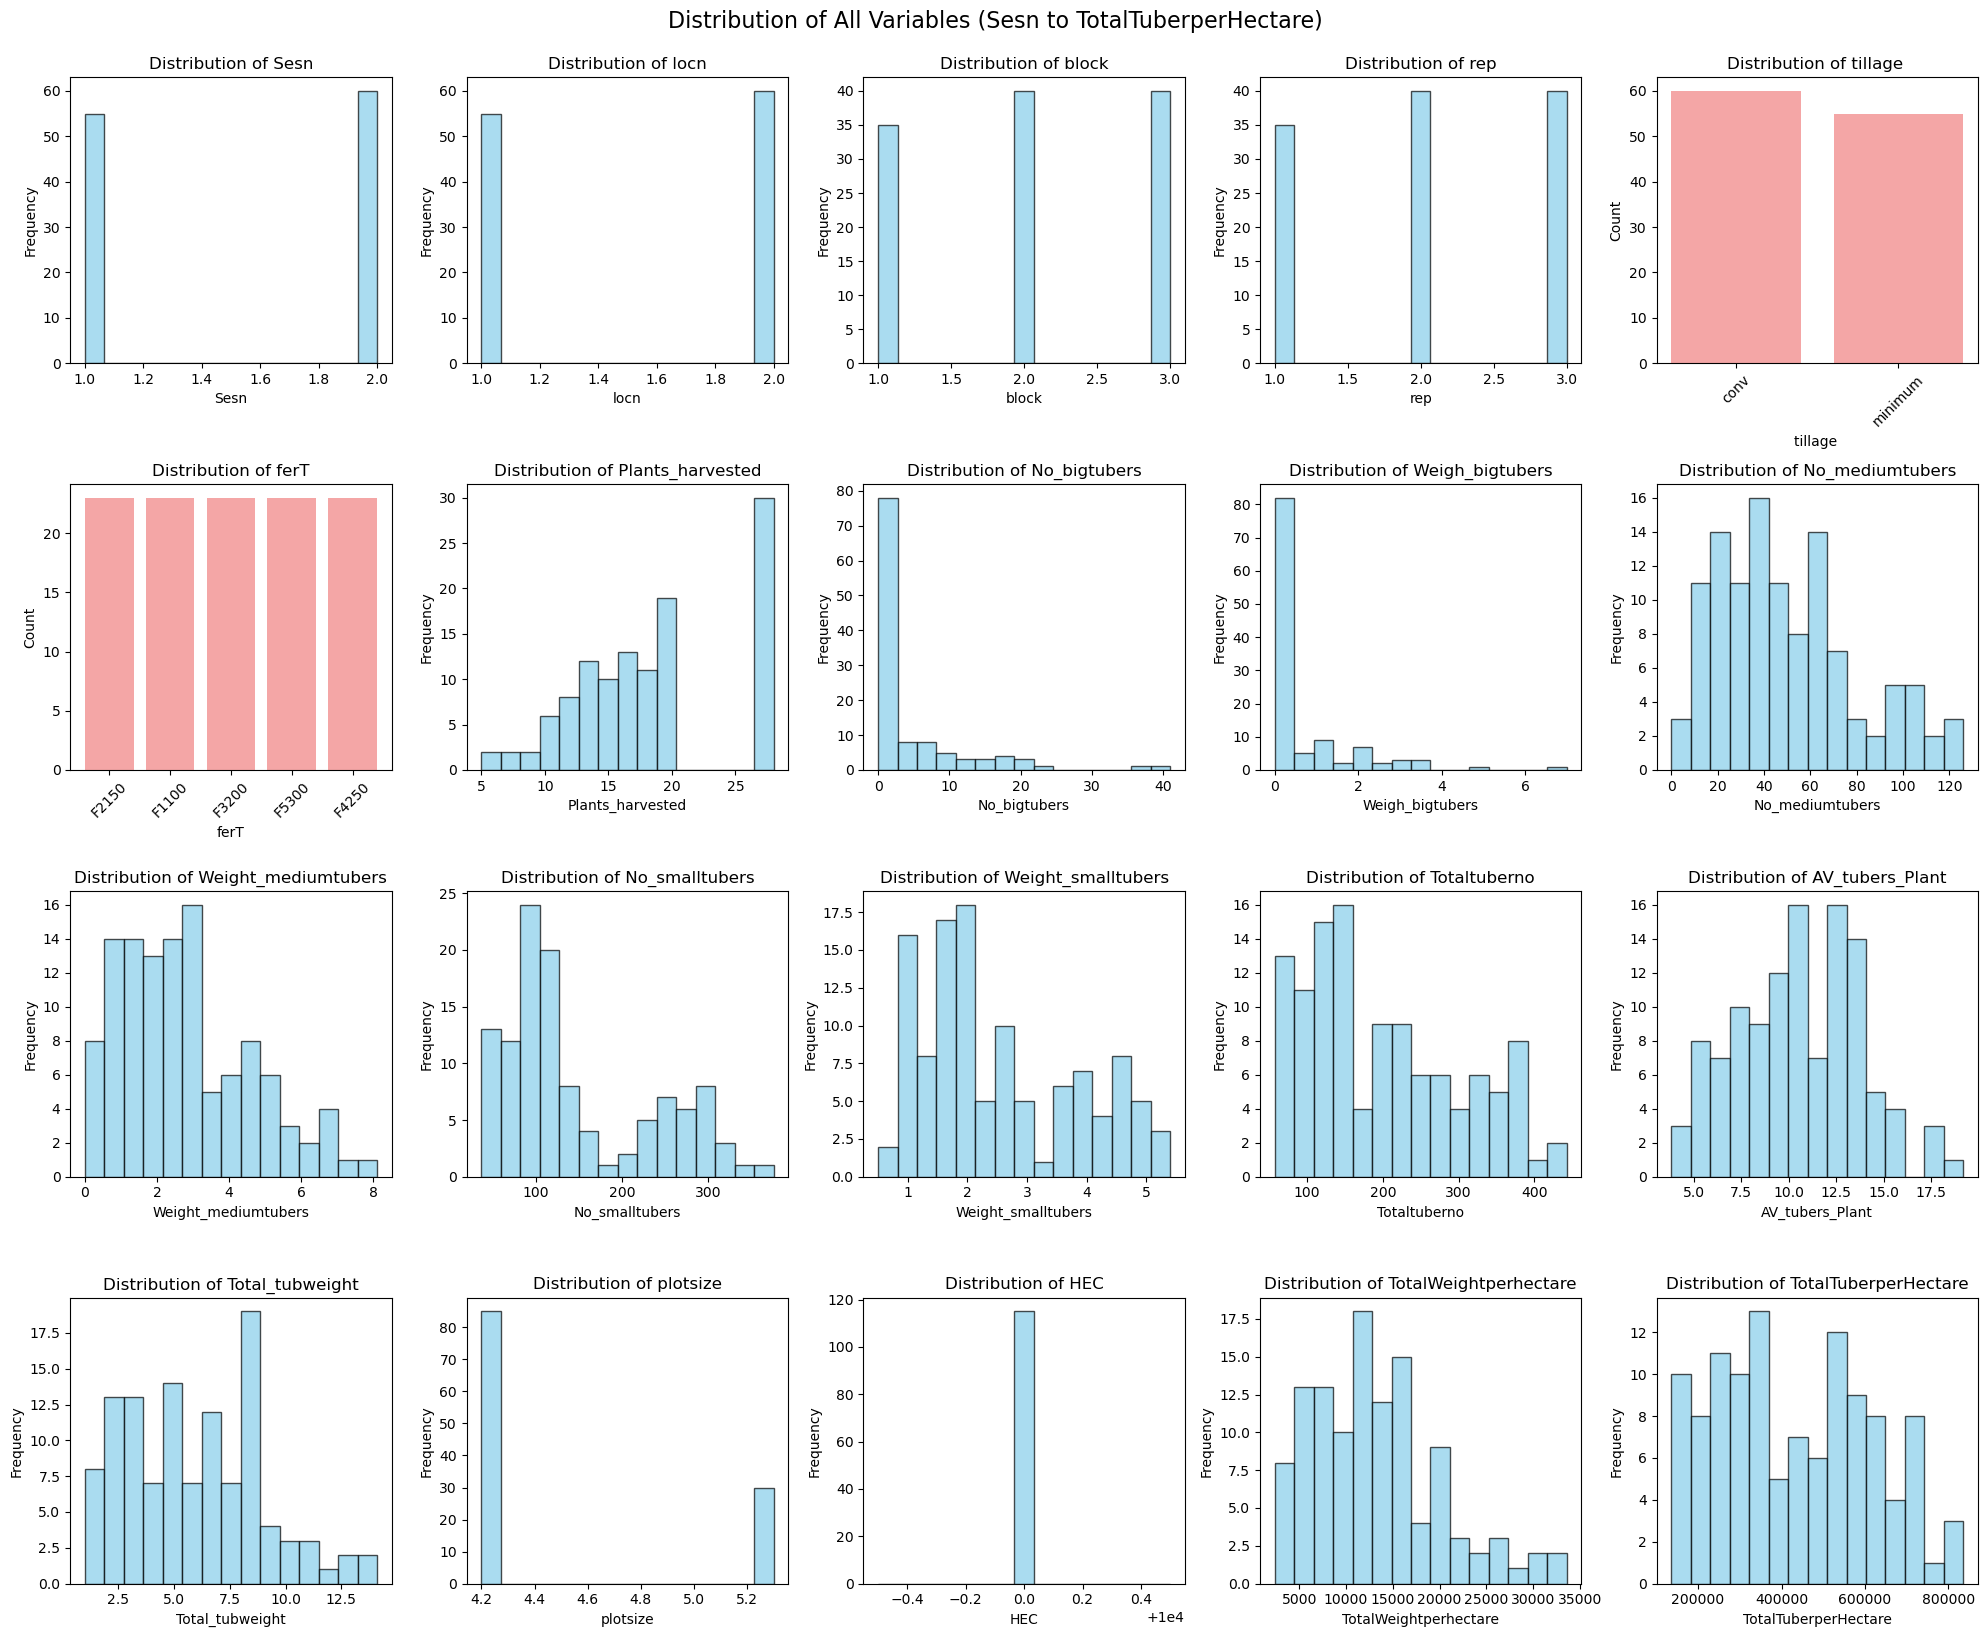


1.5 OUTLIER DETECTION - BOXPLOTS


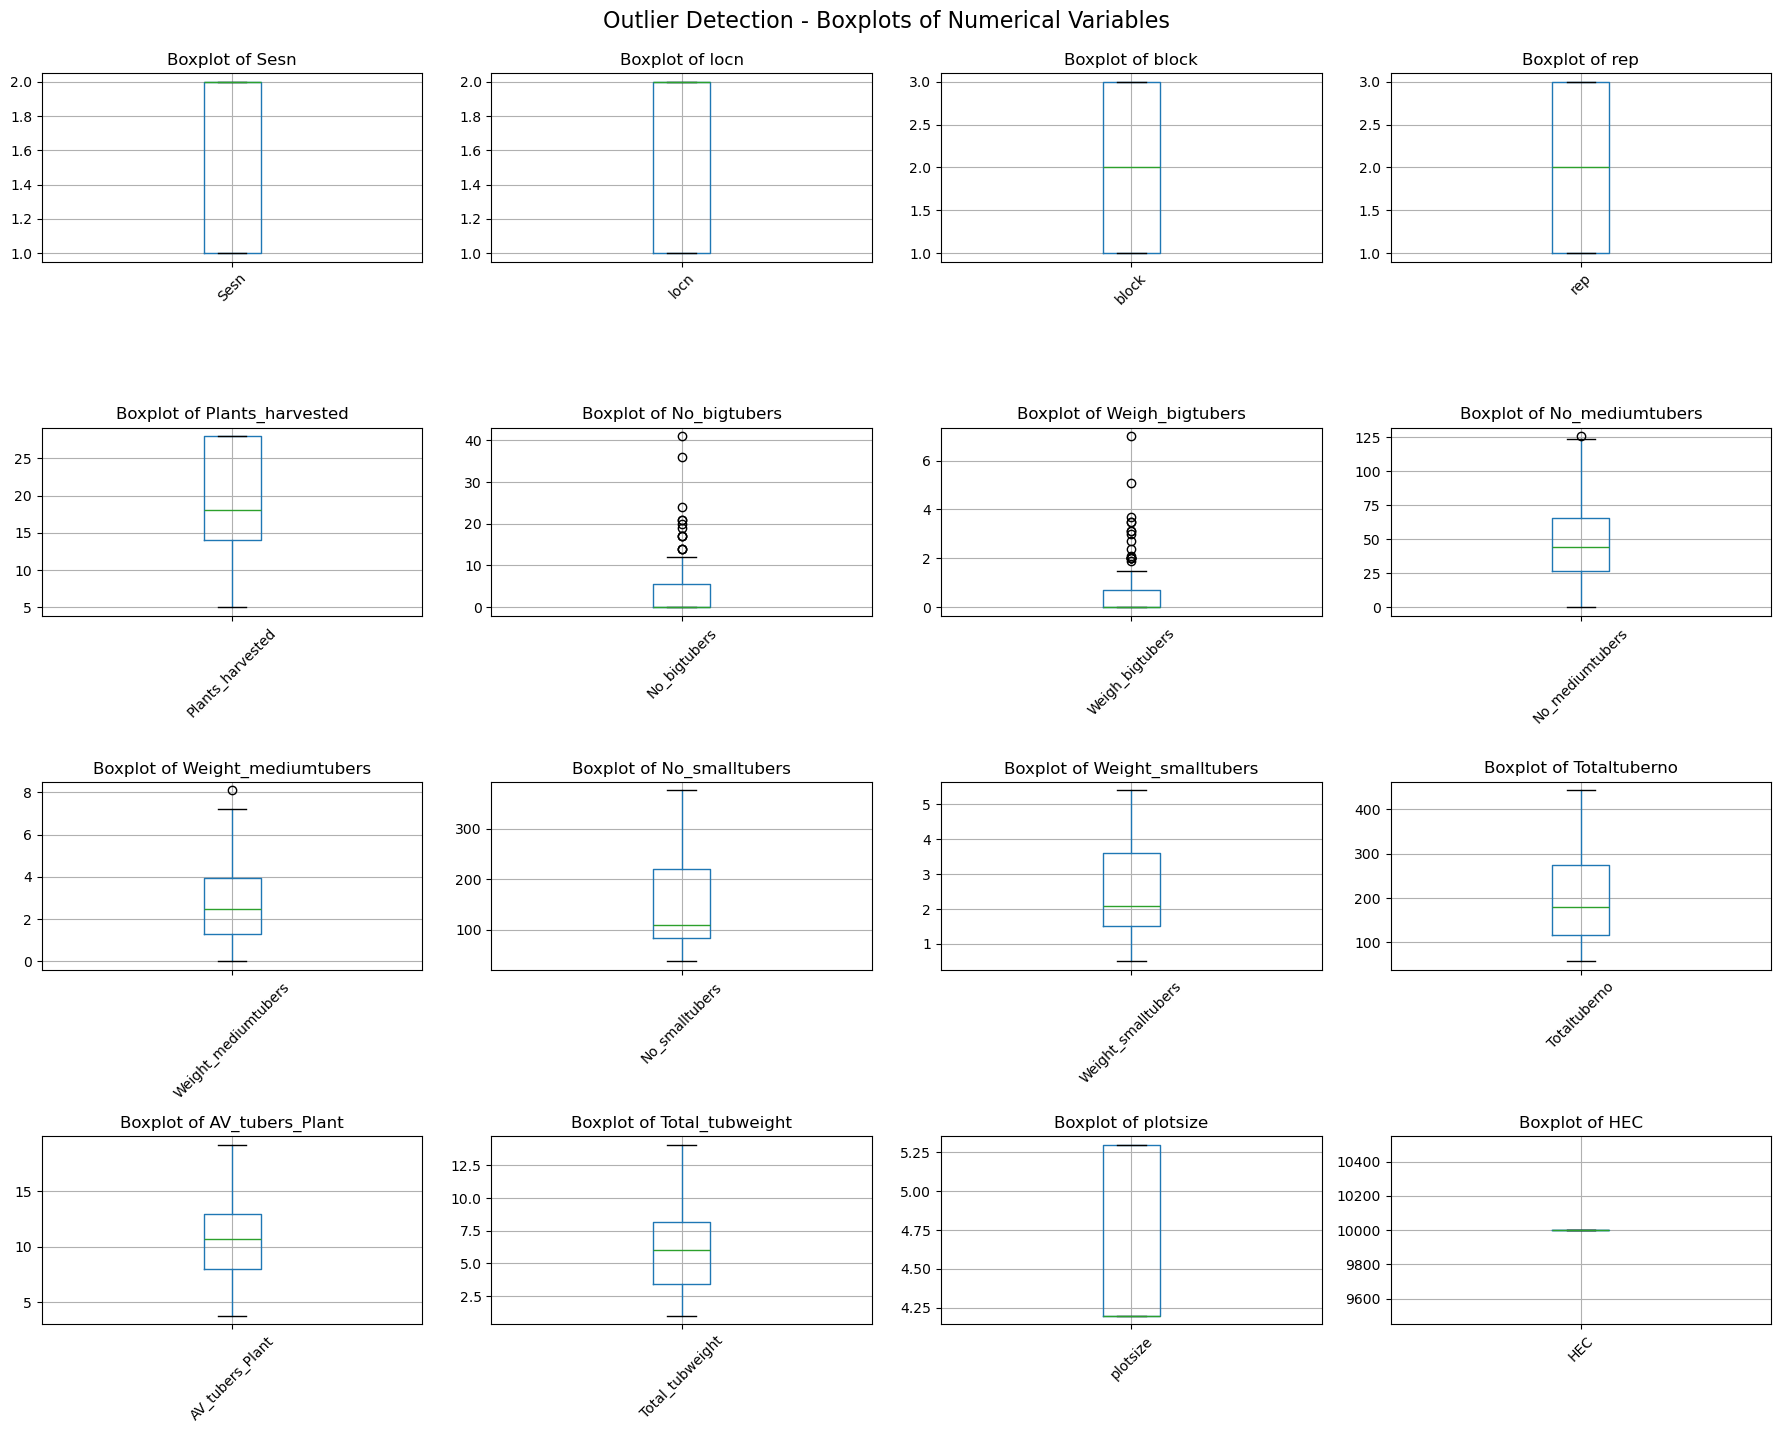


1.6 QUANTITATIVE OUTLIER ANALYSIS (IQR METHOD)
Outlier summary (IQR method):
                       outlier_count  outlier_percentage
Weigh_bigtubers                 17.0           14.782609
No_bigtubers                    13.0           11.304348
TotalWeightperhectare            4.0            3.478261
No_mediumtubers                  1.0            0.869565
Weight_mediumtubers              1.0            0.869565
Sesn                             0.0            0.000000
locn                             0.0            0.000000
Plants_harvested                 0.0            0.000000
block                            0.0            0.000000
rep                              0.0            0.000000
No_smalltubers                   0.0            0.000000
Weight_smalltubers               0.0            0.000000
AV_tubers_Plant                  0.0            0.000000
Totaltuberno                     0.0            0.000000
Total_tubweight                  0.0            0.000000
plotsize  

In [34]:

#QUESTION 1: COMPREHENSIVE DATA EXPLORATION

print("="*60)
print("QUESTION 1: DATA EXPLORATION, MISSING DATA & OUTLIERS")
print("="*60)

# 1.1 Basic dataset information
print("\n1.1 DATASET BASIC INFORMATION")
print("Dataset shape:", cassava.shape)
print("\nColumn names:", cassava.columns.tolist())
print("\nData types:")
print(cassava.dtypes)

# 1.2 Check for missing values
print("\n1.2 MISSING VALUES ANALYSIS")
missing_data = cassava.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])
if missing_data.sum() == 0:
    print("✓ No missing values found in the dataset")

# 1.3 Statistical summary
print("\n1.3 STATISTICAL SUMMARY")
print(cassava.describe())

# 1.4 Distribution of all variables (Sesn to TotalTuberperHectare)
print("\n1.4 DISTRIBUTION OF ALL VARIABLES")

# Select columns from Sesn to TotalTuberperHectare
analysis_columns = cassava.columns[:20]  # All columns up to TotalTuberperHectare

# Create distribution plots for all variables
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(analysis_columns):
    if cassava[col].dtype in ['int64', 'float64']:
        # Numerical variables - histogram
        axes[i].hist(cassava[col], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        # Categorical variables - bar plot
        value_counts = cassava[col].value_counts()
        axes[i].bar(value_counts.index, value_counts.values, color='lightcoral', alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Distribution of All Variables (Sesn to TotalTuberperHectare)', y=1.02, fontsize=16)
plt.show()

# 1.5 Outlier detection using boxplots
print("\n1.5 OUTLIER DETECTION - BOXPLOTS")

# Select numerical columns for outlier analysis
numerical_cols = cassava.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col in analysis_columns]

# Create boxplots for outlier detection
fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:16]):  # Limit to first 16 for readability
    cassava.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Outlier Detection - Boxplots of Numerical Variables', y=1.02, fontsize=16)
plt.show()

# 1.6 Quantitative outlier detection using IQR method
print("\n1.6 QUANTITATIVE OUTLIER ANALYSIS (IQR METHOD)")

outlier_summary = {}
for col in numerical_cols:
    Q1 = cassava[col].quantile(0.25)
    Q3 = cassava[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = cassava[(cassava[col] < lower_bound) | (cassava[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(cassava)) * 100
    
    outlier_summary[col] = {
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Display outliers summary
outlier_df = pd.DataFrame(outlier_summary).T
print("Outlier summary (IQR method):")
print(outlier_df[['outlier_count', 'outlier_percentage']].sort_values('outlier_count', ascending=False))

# 1.7 Data transformation for outliers
print("\n1.7 DATA TRANSFORMATION FOR OUTLIERS")

# Apply log transformation to highly skewed variables with many outliers
cassava_transformed = cassava.copy()

# Identify variables with high outlier percentage for transformation
high_outlier_vars = outlier_df[outlier_df['outlier_percentage'] > 5].index

print("Variables selected for transformation (high outlier percentage):")
for var in high_outlier_vars:
    print(f"  - {var}: {outlier_df.loc[var, 'outlier_percentage']:.1f}% outliers")

# Apply log transformation (adding small constant to avoid log(0))
for var in high_outlier_vars:
    if cassava_transformed[var].min() <= 0:
        cassava_transformed[f'log_{var}'] = np.log1p(cassava_transformed[var] - cassava_transformed[var].min() + 1)
    else:
        cassava_transformed[f'log_{var}'] = np.log1p(cassava_transformed[var])
    print(f"Applied log transformation to {var} -> log_{var}")

# Show before and after comparison for key variables
if 'TotalWeightperhectare' in high_outlier_vars:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Before transformation
    ax1.hist(cassava['TotalWeightperhectare'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Original TotalWeightperhectare')
    ax1.set_xlabel('TotalWeightperhectare')
    ax1.set_ylabel('Frequency')
    
    # After transformation
    ax2.hist(cassava_transformed['log_TotalWeightperhectare'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
    ax2.set_title('Log-transformed TotalWeightperhectare')
    ax2.set_xlabel('log_TotalWeightperhectare')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

print("✓ Question 1 completed: Comprehensive data exploration, missing data check, and outlier handling")


QUESTION 2: RELATIONSHIPS BETWEEN VARIABLES
2a. CONTINUOUS VARIABLE RELATIONSHIPS

2a. CONTINUOUS RELATIONSHIP: Total_tubweight vs TotalWeightperhectare


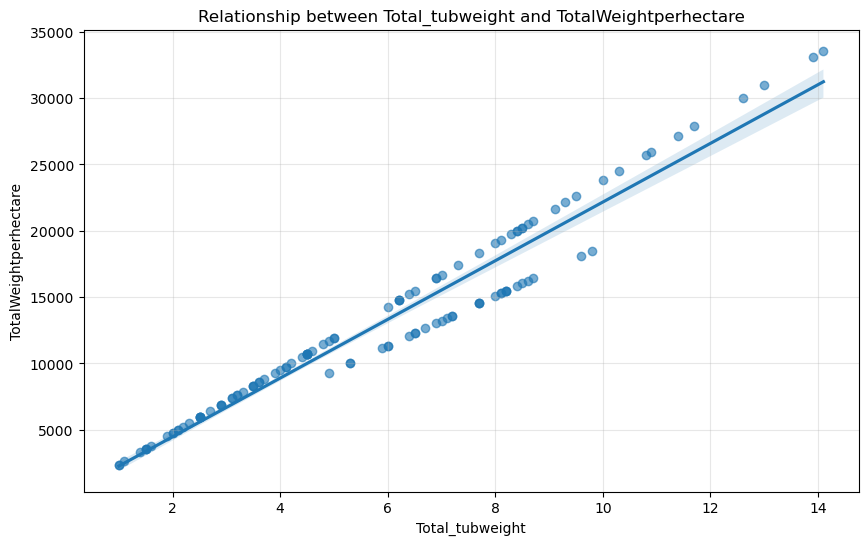

Pearson Correlation: 0.975
P-value: 0.0000
Interpretation: Strong positive relationship

2a. CONTINUOUS RELATIONSHIP: Plants_harvested vs Totaltuberno


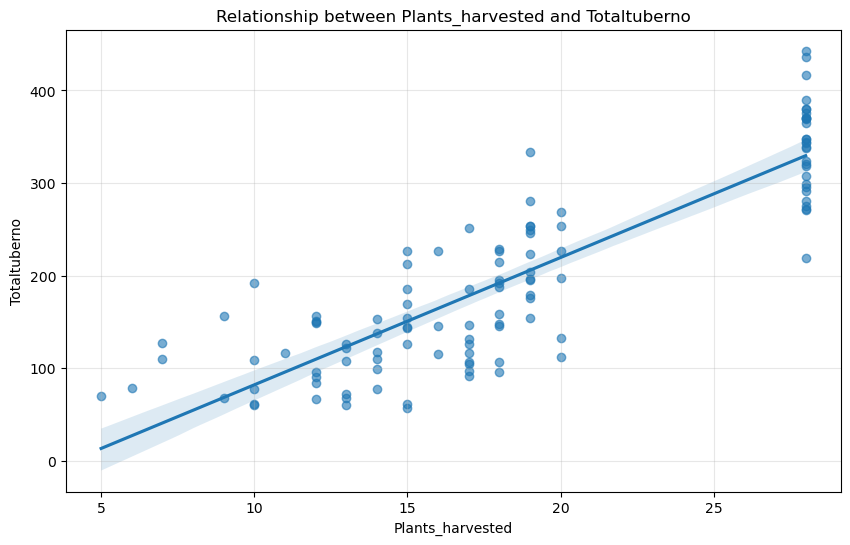

Pearson Correlation: 0.864
P-value: 0.0000
Interpretation: Strong positive relationship

2a. CONTINUOUS RELATIONSHIP: Weigh_bigtubers vs Weight_mediumtubers


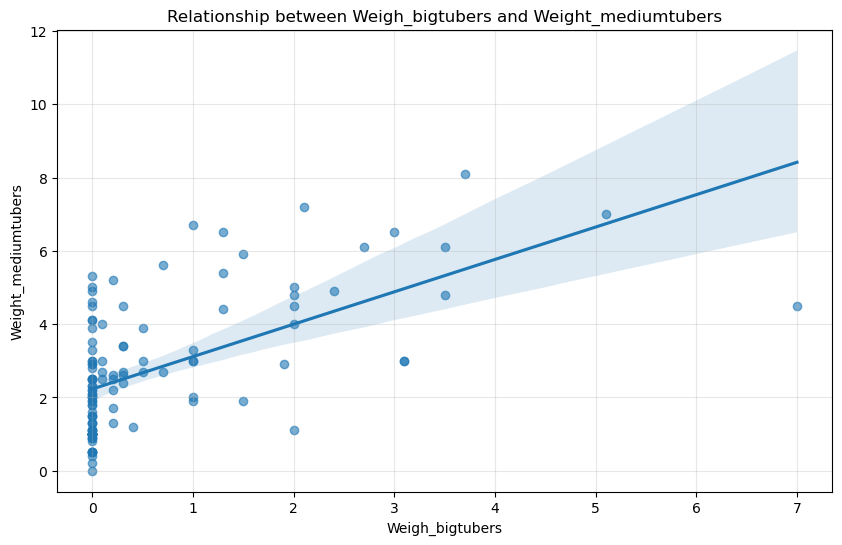

Pearson Correlation: 0.585
P-value: 0.0000
Interpretation: Moderate positive relationship

2a. CONTINUOUS RELATIONSHIP: No_smalltubers vs Weight_smalltubers


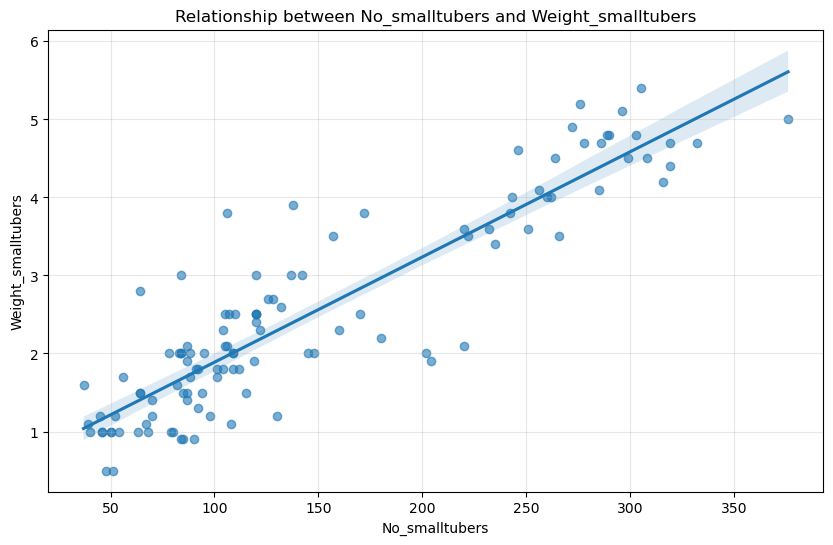

Pearson Correlation: 0.903
P-value: 0.0000
Interpretation: Strong positive relationship

2b. CATEGORICAL-CONTINUOUS RELATIONSHIPS

2b. CATEGORICAL-CONTINUOUS: tillage vs TotalWeightperhectare


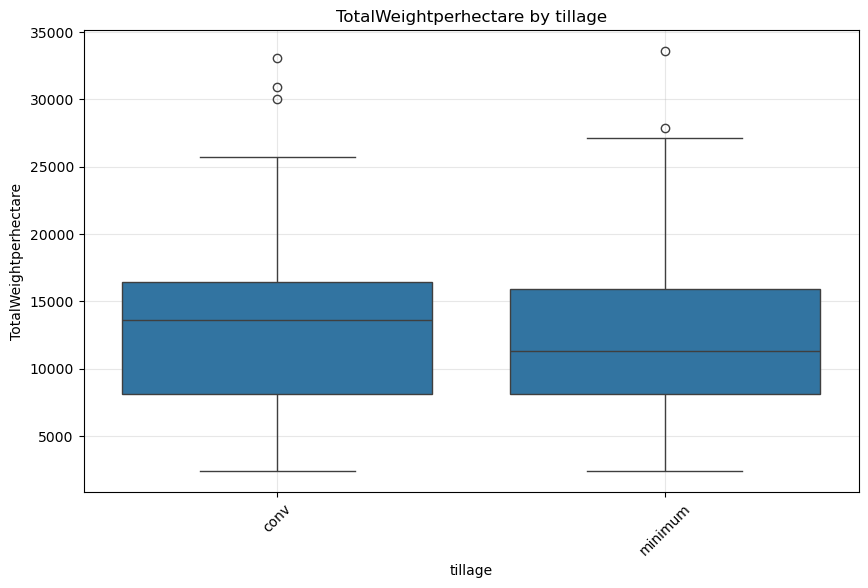

T-test Results:
Statistic: 0.511
P-value: 0.6101
Interpretation: No significant difference between groups

2b. CATEGORICAL-CONTINUOUS: ferT vs TotalTuberperHectare


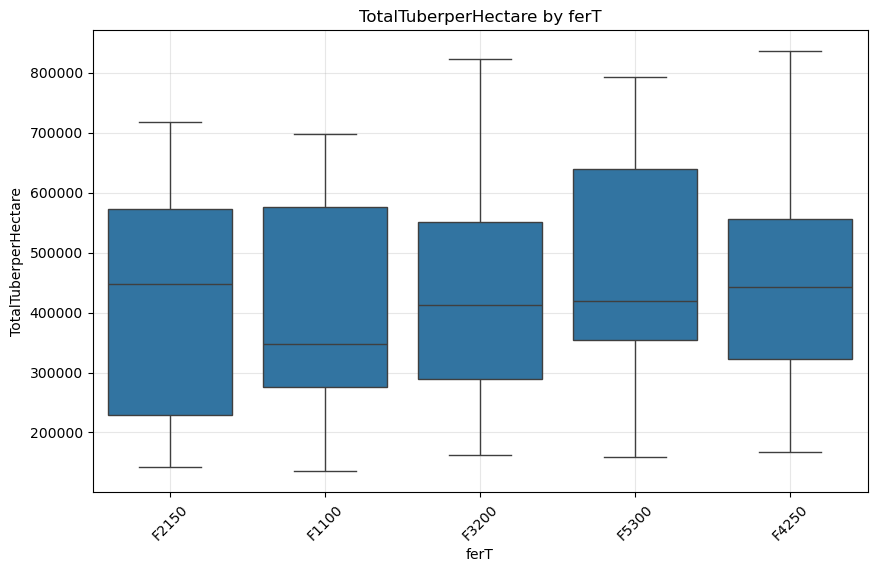

ANOVA Results:
Statistic: 0.404
P-value: 0.8051
Interpretation: No significant difference between groups

2b. CATEGORICAL-CONTINUOUS: Sesn vs Plants_harvested


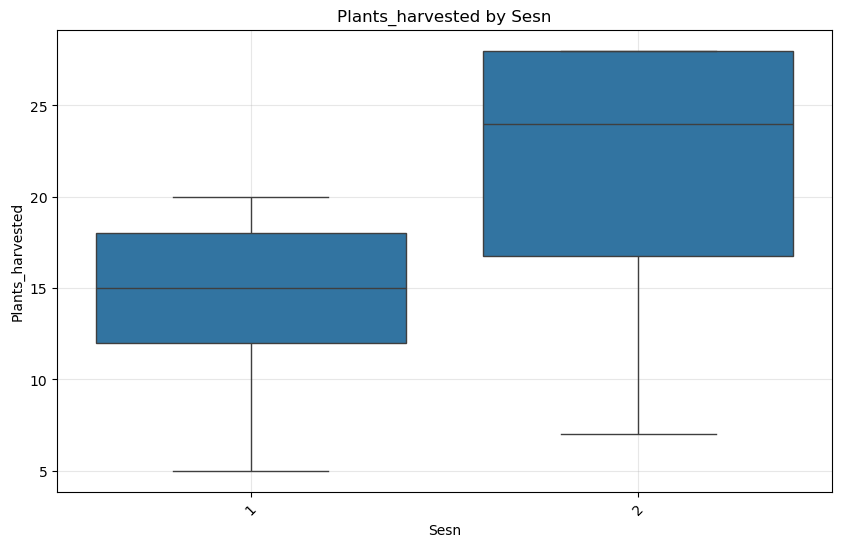

T-test Results:
Statistic: 6.727
P-value: 0.0000
Interpretation: Significant difference between groups

2c. CATEGORICAL VARIABLE RELATIONSHIPS

2c. CATEGORICAL RELATIONSHIP: tillage vs Sesn
Contingency Table:
Sesn      1   2
tillage        
conv     30  30
minimum  25  30


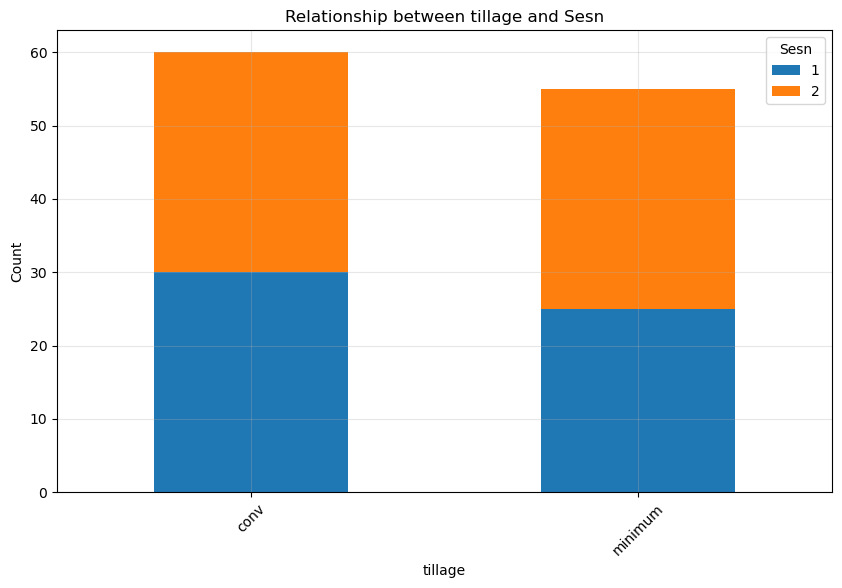


Chi-square Test Results:
Chi-square statistic: 0.090
P-value: 0.7637
Degrees of freedom: 1
Interpretation: No significant association between variables

2c. CATEGORICAL RELATIONSHIP: ferT vs locn
Contingency Table:
locn    1   2
ferT         
F1100  11  12
F2150  11  12
F3200  11  12
F4250  11  12
F5300  11  12


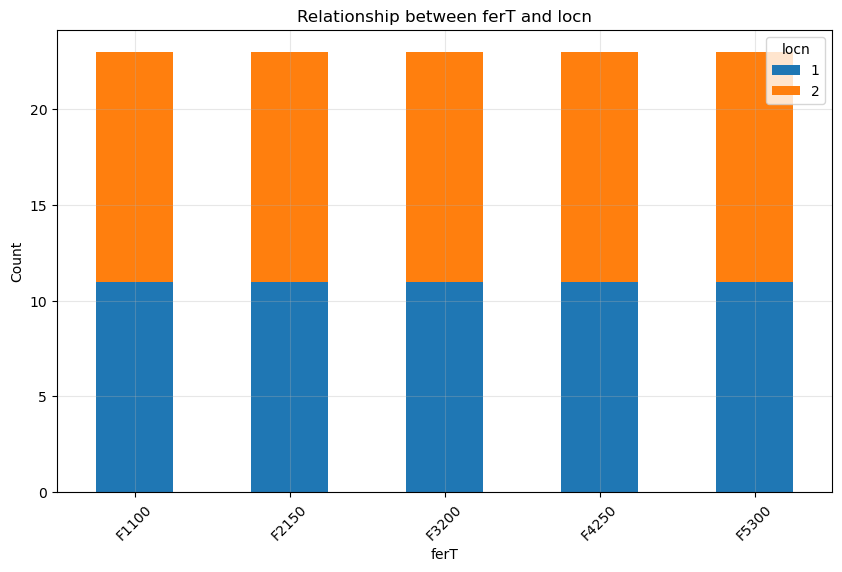


Chi-square Test Results:
Chi-square statistic: 0.000
P-value: 1.0000
Degrees of freedom: 4
Interpretation: No significant association between variables
✓ Question 2 completed: Comprehensive analysis of relationships between variables


In [35]:
#QUESTION 2: RELATIONSHIPS BETWEEN VARIABLES

print("\n" + "="*60)
print("QUESTION 2: RELATIONSHIPS BETWEEN VARIABLES")
print("="*60)

#Enhanced analysis class with more comprehensive methods
class ComprehensiveCassavaAnalysis:
    def __init__(self, data):
        self.data = data
    
    #2a. Two continuous variables
    def analyze_continuous_relationship(self, var1, var2):
        print(f"\n2a. CONTINUOUS RELATIONSHIP: {var1} vs {var2}")
        
        # Scatter plot with regression line
        plt.figure(figsize=(10, 6))
        sns.regplot(x=var1, y=var2, data=self.data, scatter_kws={'alpha':0.6})
        plt.title(f'Relationship between {var1} and {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Pearson correlation
        corr, p_value = pearsonr(self.data[var1].dropna(), self.data[var2].dropna())
        print(f"Pearson Correlation: {corr:.3f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Interpretation: {'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.3 else 'Weak'} {'positive' if corr > 0 else 'negative'} relationship")
        
        return corr, p_value
    
    #2b. One continuous and one categorical variable
    def analyze_categorical_continuous_relationship(self, cat_var, cont_var):
        print(f"\n2b. CATEGORICAL-CONTINUOUS: {cat_var} vs {cont_var}")
        
        #Boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_var, y=cont_var, data=self.data)
        plt.title(f'{cont_var} by {cat_var}')
        plt.xlabel(cat_var)
        plt.ylabel(cont_var)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.show()
        
        #Statistical test
        groups = self.data[cat_var].unique()
        group_data = [self.data[self.data[cat_var] == group][cont_var].dropna() for group in groups]
        
        if len(groups) == 2:
            #T-test for two groups
            stat, p_value = ttest_ind(group_data[0], group_data[1], equal_var=False)
            test_type = "T-test"
        else:
            #ANOVA for multiple groups
            stat, p_value = f_oneway(*group_data)
            test_type = "ANOVA"
        
        print(f"{test_type} Results:")
        print(f"Statistic: {stat:.3f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Interpretation: {'Significant' if p_value < 0.05 else 'No significant'} difference between groups")
        
        return stat, p_value
    
    #2c. Two categorical variables
    def analyze_categorical_relationship(self, cat_var1, cat_var2):
        print(f"\n2c. CATEGORICAL RELATIONSHIP: {cat_var1} vs {cat_var2}")
        
        #Contingency table
        contingency_table = pd.crosstab(self.data[cat_var1], self.data[cat_var2])
        print("Contingency Table:")
        print(contingency_table)
        
        #Stacked bar plot
        plt.figure(figsize=(10, 6))
        contingency_table.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title(f'Relationship between {cat_var1} and {cat_var2}')
        plt.xlabel(cat_var1)
        plt.ylabel('Count')
        plt.legend(title=cat_var2)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.show()
        
        #Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"\nChi-square Test Results:")
        print(f"Chi-square statistic: {chi2:.3f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Degrees of freedom: {dof}")
        print(f"Interpretation: {'Significant' if p_value < 0.05 else 'No significant'} association between variables")
        
        return chi2, p_value

#Initialize analysis
analysis = ComprehensiveCassavaAnalysis(cassava)
#Clean column name: 'tillage ' -> 'tillage'
cassava.columns = cassava.columns.str.strip()

#2a. Analyze multiple continuous variable relationships
print("2a. CONTINUOUS VARIABLE RELATIONSHIPS")
continuous_pairs = [
    ('Total_tubweight', 'TotalWeightperhectare'),
    ('Plants_harvested', 'Totaltuberno'),
    ('Weigh_bigtubers', 'Weight_mediumtubers'),
    ('No_smalltubers', 'Weight_smalltubers')
]

continuous_results = {}
for var1, var2 in continuous_pairs:
    continuous_results[(var1, var2)] = analysis.analyze_continuous_relationship(var1, var2)

#2b. Analyze categorical-continuous relationships
print("\n2b. CATEGORICAL-CONTINUOUS RELATIONSHIPS")
cat_cont_pairs = [
    ('tillage', 'TotalWeightperhectare'),
    ('ferT', 'TotalTuberperHectare'),
    ('Sesn', 'Plants_harvested')
]

cat_cont_results = {}
for cat_var, cont_var in cat_cont_pairs:
    cat_cont_results[(cat_var, cont_var)] = analysis.analyze_categorical_continuous_relationship(cat_var, cont_var)

#2c. Analyze categorical relationships
print("\n2c. CATEGORICAL VARIABLE RELATIONSHIPS")
categorical_pairs = [
    ('tillage', 'Sesn'),
    ('ferT', 'locn')
]

categorical_results = {}
for cat_var1, cat_var2 in categorical_pairs:
    categorical_results[(cat_var1, cat_var2)] = analysis.analyze_categorical_relationship(cat_var1, cat_var2)

print("✓ Question 2 completed: Comprehensive analysis of relationships between variables")


QUESTION 3: FERTILIZER & TILLAGE EFFECTS ON YIELD
3a. FERTILIZER EFFECT ON YIELD

--- Effect of Fertilizer on TotalWeightperhectare ---


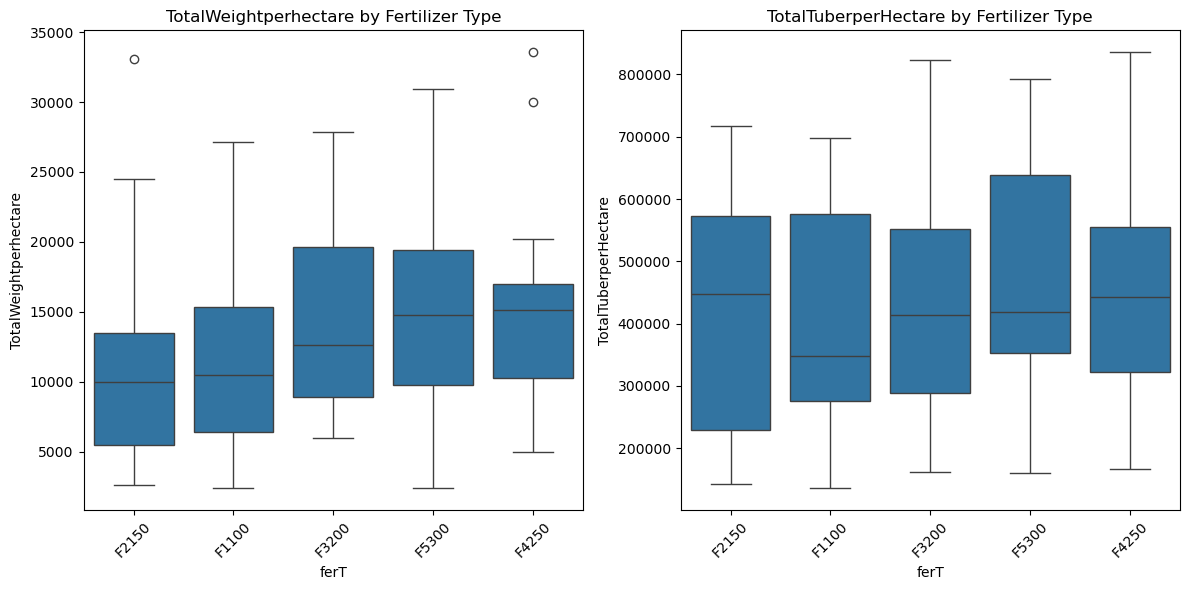

ANOVA Results for Fertilizer effect on TotalWeightperhectare:
F-statistic: 2.093
P-value: 0.0866
✗ No significant difference in TotalWeightperhectare across fertilizer types

ANOVA Results for Fertilizer effect on TotalTuberperHectare:
F-statistic: 0.404
P-value: 0.8051
✗ No significant difference in TotalTuberperHectare across fertilizer types

3b. TILLAGE EFFECT ON YIELD

--- Effect of Tillage on Yield ---


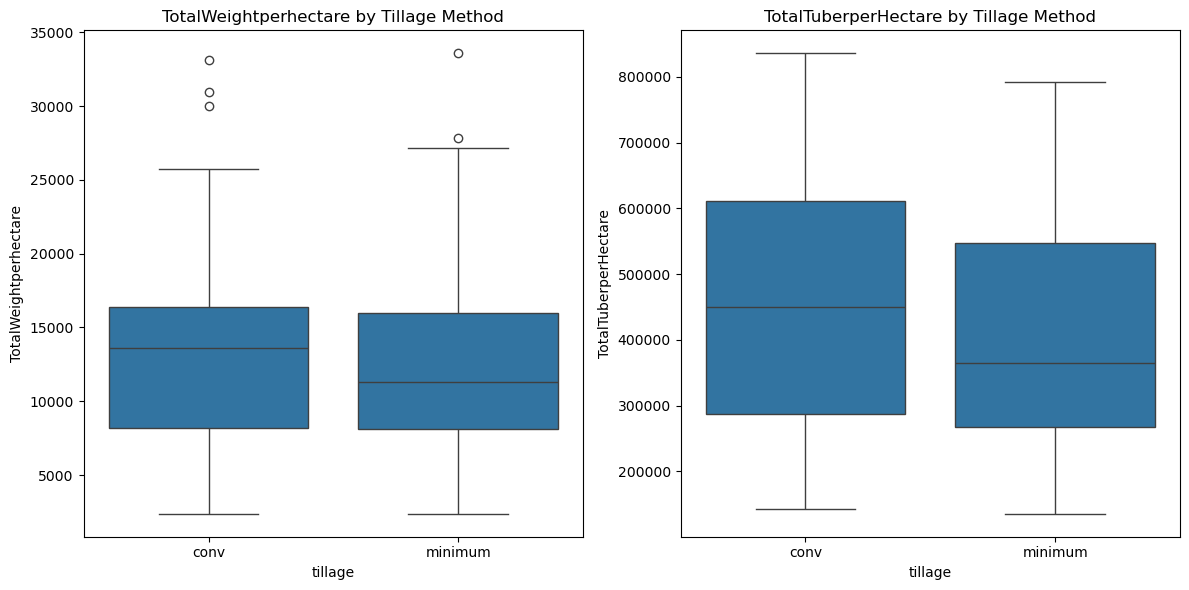

T-test Results for Tillage effect on TotalWeightperhectare:
T-statistic: 0.511
P-value: 0.6101
✗ No significant difference in TotalWeightperhectare between tillage methods

T-test Results for Tillage effect on TotalTuberperHectare:
T-statistic: 1.389
P-value: 0.1676
✗ No significant difference in TotalTuberperHectare between tillage methods

3c. COMBINED EFFECT: FERTILIZER × TILLAGE


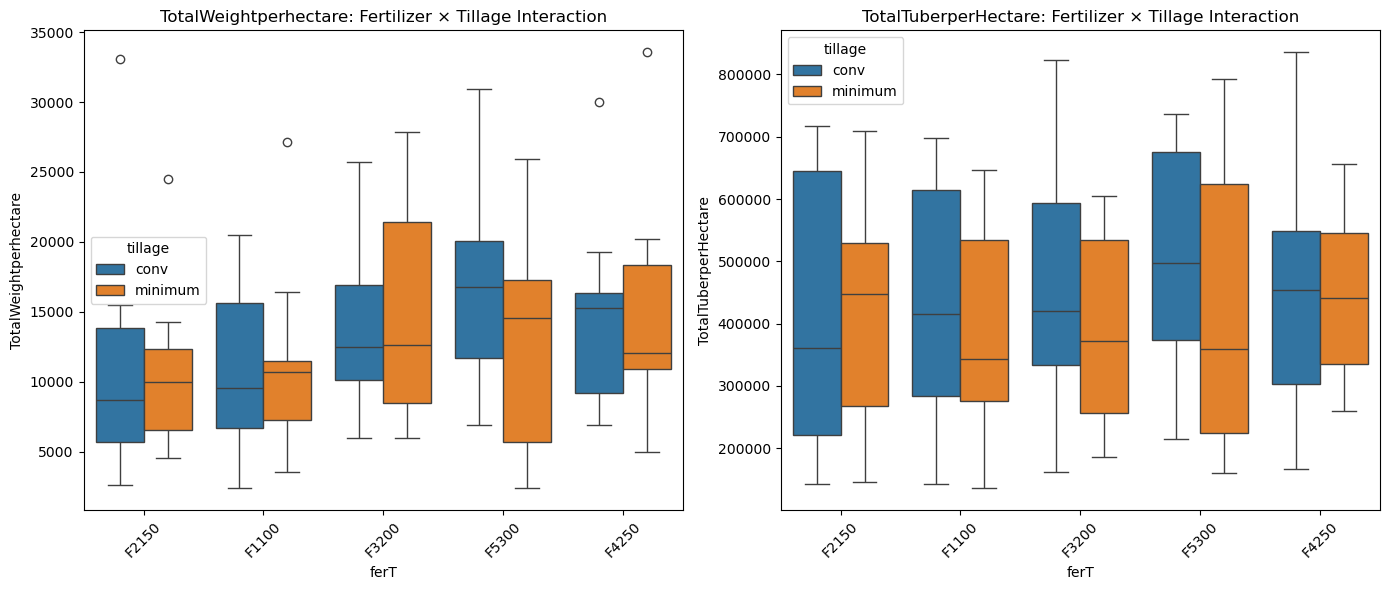

✓ Question 3 completed: Analysis of fertilizer and tillage effects on yield


In [36]:
#QUESTION 3: FERTILIZER & TILLAGE EFFECTS ON YIELD

print("\n" + "="*60)
print("QUESTION 3: FERTILIZER & TILLAGE EFFECTS ON YIELD")
print("="*60)

#3a. Does fertilizer application affect yield?
print("3a. FERTILIZER EFFECT ON YIELD")

#Analyze effect of fertilizer on TotalWeightperhectare
print("\n--- Effect of Fertilizer on TotalWeightperhectare ---")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='ferT', y='TotalWeightperhectare', data=cassava)
plt.title('TotalWeightperhectare by Fertilizer Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='ferT', y='TotalTuberperHectare', data=cassava)
plt.title('TotalTuberperHectare by Fertilizer Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Statistical test - ANOVA for fertilizer effect
fertilizer_groups = [cassava[cassava['ferT'] == fert]['TotalWeightperhectare'] for fert in cassava['ferT'].unique()]
f_stat, p_value = f_oneway(*fertilizer_groups)

print(f"ANOVA Results for Fertilizer effect on TotalWeightperhectare:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✓ Significant difference in TotalWeightperhectare across fertilizer types")
    #Post-hoc analysis - compare means
    fert_means = cassava.groupby('ferT')['TotalWeightperhectare'].mean().sort_values(ascending=False)
    print("\nMean TotalWeightperhectare by fertilizer type:")
    for fert, mean_yield in fert_means.items():
        print(f"  {fert}: {mean_yield:.2f}")
else:
    print("✗ No significant difference in TotalWeightperhectare across fertilizer types")

#Repeat for TotalTuberperHectare
fertilizer_groups_tuber = [cassava[cassava['ferT'] == fert]['TotalTuberperHectare'] for fert in cassava['ferT'].unique()]
f_stat_tuber, p_value_tuber = f_oneway(*fertilizer_groups_tuber)

print(f"\nANOVA Results for Fertilizer effect on TotalTuberperHectare:")
print(f"F-statistic: {f_stat_tuber:.3f}")
print(f"P-value: {p_value_tuber:.4f}")

if p_value_tuber < 0.05:
    print("✓ Significant difference in TotalTuberperHectare across fertilizer types")
    tuber_means = cassava.groupby('ferT')['TotalTuberperHectare'].mean().sort_values(ascending=False)
    print("\nMean TotalTuberperHectare by fertilizer type:")
    for fert, mean_tuber in tuber_means.items():
        print(f"  {fert}: {mean_tuber:.2f}")
else:
    print("✗ No significant difference in TotalTuberperHectare across fertilizer types")

#3b. Does tillage method affect yield?
print("\n3b. TILLAGE EFFECT ON YIELD")

#Analyze effect of tillage on yield
print("\n--- Effect of Tillage on Yield ---")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='tillage', y='TotalWeightperhectare', data=cassava)
plt.title('TotalWeightperhectare by Tillage Method')

plt.subplot(1, 2, 2)
sns.boxplot(x='tillage', y='TotalTuberperHectare', data=cassava)
plt.title('TotalTuberperHectare by Tillage Method')

plt.tight_layout()
plt.show()

#Statistical test - T-test for tillage effect (only two groups: conv and minimum)
tillage_groups_weight = [cassava[cassava['tillage'] == tillage]['TotalWeightperhectare'] 
                        for tillage in cassava['tillage'].unique()]

if len(tillage_groups_weight) == 2:
    t_stat_weight, p_value_weight = ttest_ind(tillage_groups_weight[0], tillage_groups_weight[1], equal_var=False)
    
    print(f"T-test Results for Tillage effect on TotalWeightperhectare:")
    print(f"T-statistic: {t_stat_weight:.3f}")
    print(f"P-value: {p_value_weight:.4f}")
    
    if p_value_weight < 0.05:
        print("✓ Significant difference in TotalWeightperhectare between tillage methods")
        tillage_means_weight = cassava.groupby('tillage')['TotalWeightperhectare'].mean()
        for tillage, mean_yield in tillage_means_weight.items():
            print(f"  {tillage}: {mean_yield:.2f}")
    else:
        print("✗ No significant difference in TotalWeightperhectare between tillage methods")

#Repeat for TotalTuberperHectare
tillage_groups_tuber = [cassava[cassava['tillage'] == tillage]['TotalTuberperHectare'] 
                       for tillage in cassava['tillage'].unique()]

if len(tillage_groups_tuber) == 2:
    t_stat_tuber, p_value_tuber = ttest_ind(tillage_groups_tuber[0], tillage_groups_tuber[1], equal_var=False)
    
    print(f"\nT-test Results for Tillage effect on TotalTuberperHectare:")
    print(f"T-statistic: {t_stat_tuber:.3f}")
    print(f"P-value: {p_value_tuber:.4f}")
    
    if p_value_tuber < 0.05:
        print("✓ Significant difference in TotalTuberperHectare between tillage methods")
        tillage_means_tuber = cassava.groupby('tillage')['TotalTuberperHectare'].mean()
        for tillage, mean_tuber in tillage_means_tuber.items():
            print(f"  {tillage}: {mean_tuber:.2f}")
    else:
        print("✗ No significant difference in TotalTuberperHectare between tillage methods")

#Combined analysis: Interaction between fertilizer and tillage
print("\n3c. COMBINED EFFECT: FERTILIZER × TILLAGE")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='ferT', y='TotalWeightperhectare', hue='tillage', data=cassava)
plt.title('TotalWeightperhectare: Fertilizer × Tillage Interaction')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='ferT', y='TotalTuberperHectare', hue='tillage', data=cassava)
plt.title('TotalTuberperHectare: Fertilizer × Tillage Interaction')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("✓ Question 3 completed: Analysis of fertilizer and tillage effects on yield")


QUESTION 4: ASSOCIATION MINING BETWEEN FERTILIZERS ACROSS SEASONS
4a. PREPARING DATA FOR ASSOCIATION MINING
Created 4 transactions (season-location combinations)
Sample transactions:
  Transaction 1: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300']
  Transaction 2: ['F1100', 'F3200', 'F2150', 'F4250', 'F5300']
  Transaction 3: ['F2150', 'F1100', 'F3200', 'F5300', 'F4250']
  Transaction 4: ['F1100', 'F5300', 'F4250', 'F3200', 'F2150']

Transaction matrix shape: (4, 5)
Available items (fertilizers): ['F1100', 'F2150', 'F3200', 'F4250', 'F5300']

4b. FREQUENT ITEMSETS USING APRIORI ALGORITHM
Found 31 frequent itemsets with minimum support ≥ 0.2

Most frequent itemsets:
   support        itemsets  length
0      1.0         (F1100)       1
1      1.0         (F2150)       1
2      1.0         (F3200)       1
3      1.0         (F4250)       1
4      1.0         (F5300)       1
5      1.0  (F1100, F2150)       2
6      1.0  (F1100, F3200)       2
7      1.0  (F4250, F1100)       2
8      1.0  

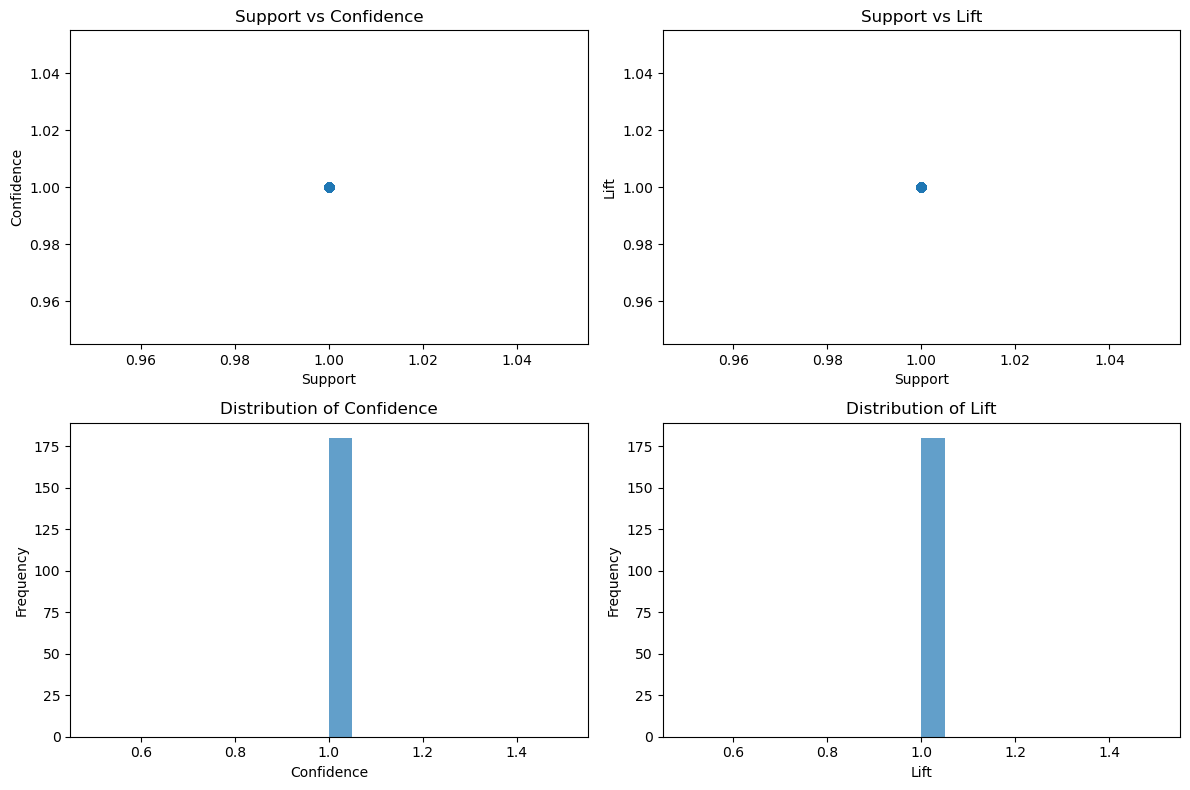


4d. SEASON-SPECIFIC FERTILIZER PATTERNS
Fertilizer usage by season:
ferT  F1100  F2150  F3200  F4250  F5300
Sesn                                   
1        11     11     11     11     11
2        12     12     12     12     12

Fertilizer usage by season (%):
ferT  F1100  F2150  F3200  F4250  F5300
Sesn                                   
1      20.0   20.0   20.0   20.0   20.0
2      20.0   20.0   20.0   20.0   20.0


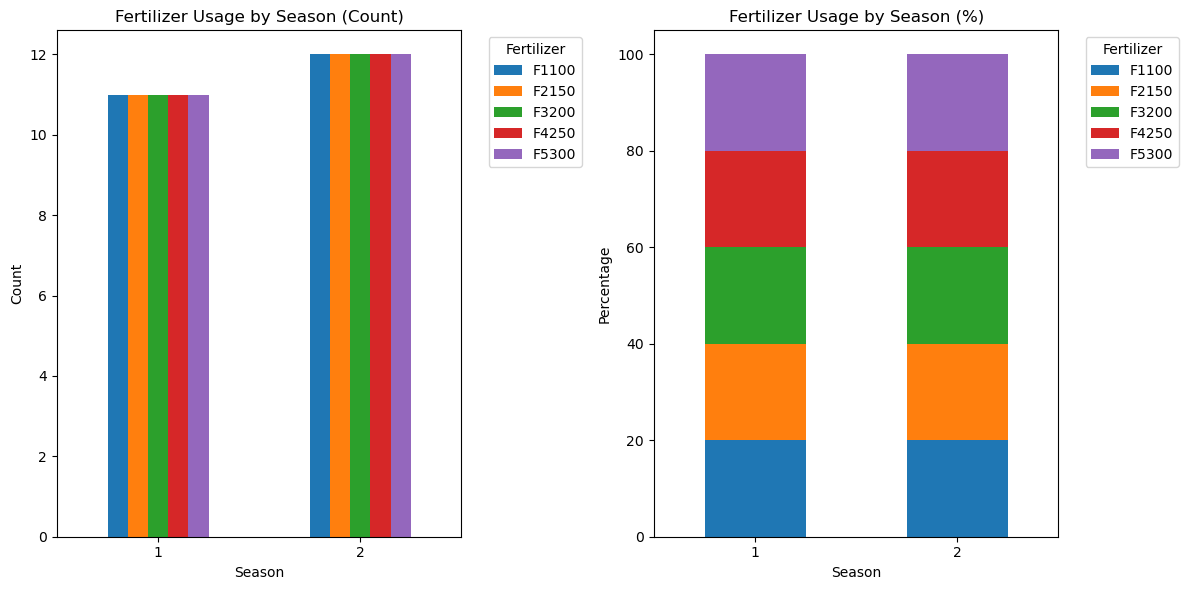

✓ Question 4 completed: Association mining between fertilizers across seasons


In [37]:
#QUESTION 4: ASSOCIATION MINING BETWEEN FERTILIZERS ACROSS SEASONS

print("\n" + "="*60)
print("QUESTION 4: ASSOCIATION MINING BETWEEN FERTILIZERS ACROSS SEASONS")
print("="*60)

#Prepare data for association mining
#We'll look for patterns in fertilizer usage across seasons and locations

#Create transactions: each transaction represents a season-location combination
#with the fertilizers used

print("4a. PREPARING DATA FOR ASSOCIATION MINING")

#Group by season and location to see which fertilizers are used together
transactions = []

for (season, location), group in cassava.groupby(['Sesn', 'locn']):
    fertilizers_used = group['ferT'].unique().tolist()
    transactions.append(fertilizers_used)
    
print(f"Created {len(transactions)} transactions (season-location combinations)")
print("Sample transactions:")
for i, transaction in enumerate(transactions[:5]):
    print(f"  Transaction {i+1}: {transaction}")

#Convert to transaction format for mlxtend
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nTransaction matrix shape: {transaction_df.shape}")
print("Available items (fertilizers):", list(transaction_df.columns))

#4b. Find frequent itemsets using Apriori algorithm
print("\n4b. FREQUENT ITEMSETS USING APRIORI ALGORITHM")

#Find frequent itemsets with minimum support
min_support = 0.2  # 20% minimum support
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)

print(f"Found {len(frequent_itemsets)} frequent itemsets with minimum support ≥ {min_support}")
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

#Display frequent itemsets
print("\nMost frequent itemsets:")
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
print(frequent_itemsets.head(10))

#4c. Generate association rules
print("\n4c. ASSOCIATION RULES")

if len(frequent_itemsets) > 0:
    #Generate association rules (suppress divide-by-zero/invalid warnings from mlxtend internals)
    with np.errstate(divide='ignore', invalid='ignore'):
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    #Replace infinite values and fill NaNs (which may result from 0/0) with 0 for safety
    if len(rules) > 0:
        rules = rules.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    print(f"Generated {len(rules)} association rules")
    
    if len(rules) > 0:
        #Display top association rules
        rules = rules.sort_values('confidence', ascending=False)
        print("\nTop association rules (sorted by confidence):")
        display_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
        print(rules[display_columns].head(10))
        
        #Interpret the rules
        print("\nINTERPRETATION OF ASSOCIATION RULES:")
        for i, rule in rules.head(5).iterrows():
            antecedents = list(rule['antecedents'])
            consequents = list(rule['consequents'])
            support = rule['support']
            confidence = rule['confidence']
            lift = rule['lift']
            
            print(f"Rule: {antecedents} → {consequents}")
            print(f"  Support: {support:.3f} ({support*100:.1f}% of transactions)")
            print(f"  Confidence: {confidence:.3f} (when {antecedents} are used, {confidence*100:.1f}% also use {consequents})")
            print(f"  Lift: {lift:.3f} (rule is {lift:.1f}x more likely than random chance)")
            print()
        
        #Visualization of association rules
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Support vs Confidence')
        
        plt.subplot(2, 2, 2)
        plt.scatter(rules['support'], rules['lift'], alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Lift')
        plt.title('Support vs Lift')
        
        plt.subplot(2, 2, 3)
        plt.hist(rules['confidence'], bins=20, alpha=0.7)
        plt.xlabel('Confidence')
        plt.ylabel('Frequency')
        plt.title('Distribution of Confidence')
        
        plt.subplot(2, 2, 4)
        plt.hist(rules['lift'], bins=20, alpha=0.7)
        plt.xlabel('Lift')
        plt.ylabel('Frequency')
        plt.title('Distribution of Lift')
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("No association rules found with the current thresholds")
        print("Try lowering the minimum confidence threshold")
else:
    print("No frequent itemsets found with the current support threshold")
    print("Try lowering the minimum support threshold")

# 4d. Season-specific analysis
print("\n4d. SEASON-SPECIFIC FERTILIZER PATTERNS")

#Analyze fertilizer usage by season
season_fertilizer = cassava.groupby(['Sesn', 'ferT']).size().unstack(fill_value=0)
print("Fertilizer usage by season:")
print(season_fertilizer)

#Calculate usage percentages
season_fertilizer_pct = season_fertilizer.div(season_fertilizer.sum(axis=1), axis=0) * 100
print("\nFertilizer usage by season (%):")
print(season_fertilizer_pct.round(1))

#Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
season_fertilizer.plot(kind='bar', ax=plt.gca())
plt.title('Fertilizer Usage by Season (Count)')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
season_fertilizer_pct.plot(kind='bar', ax=plt.gca(), stacked=True)
plt.title('Fertilizer Usage by Season (%)')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("✓ Question 4 completed: Association mining between fertilizers across seasons")


QUESTION 5: PREDICTIVE MODEL FOR 'Plants_harvested'
5a. DATA PREPARATION FOR PREDICTIVE MODELING
Feature matrix shape: (115, 17)
Target variable: Plants_harvested
Number of features: 17

5b. DATA SPLITTING
Training set: 92 samples
Testing set: 23 samples

5c. FEATURE SCALING

5d. MODEL TRAINING AND COMPARISON

Training Linear Regression...
Linear Regression Performance:
  MSE: 8.18
  RMSE: 2.86
  R²: 0.8178

Training Random Forest...
Random Forest Performance:
  MSE: 6.13
  RMSE: 2.48
  R²: 0.8635

5e. MODEL COMPARISON AND SELECTION

Best Model: Random Forest
R² Score: 0.8635
RMSE: 2.48

5f. FEATURE IMPORTANCE ANALYSIS
Top 10 Most Important Features:
                  feature  importance
14               plotsize    0.648983
10         No_smalltubers    0.095524
12           Totaltuberno    0.056533
1                    locn    0.047966
11     Weight_smalltubers    0.046195
0                    Sesn    0.022930
16   TotalTuberperHectare    0.022608
9     Weight_mediumtubers    0.01535

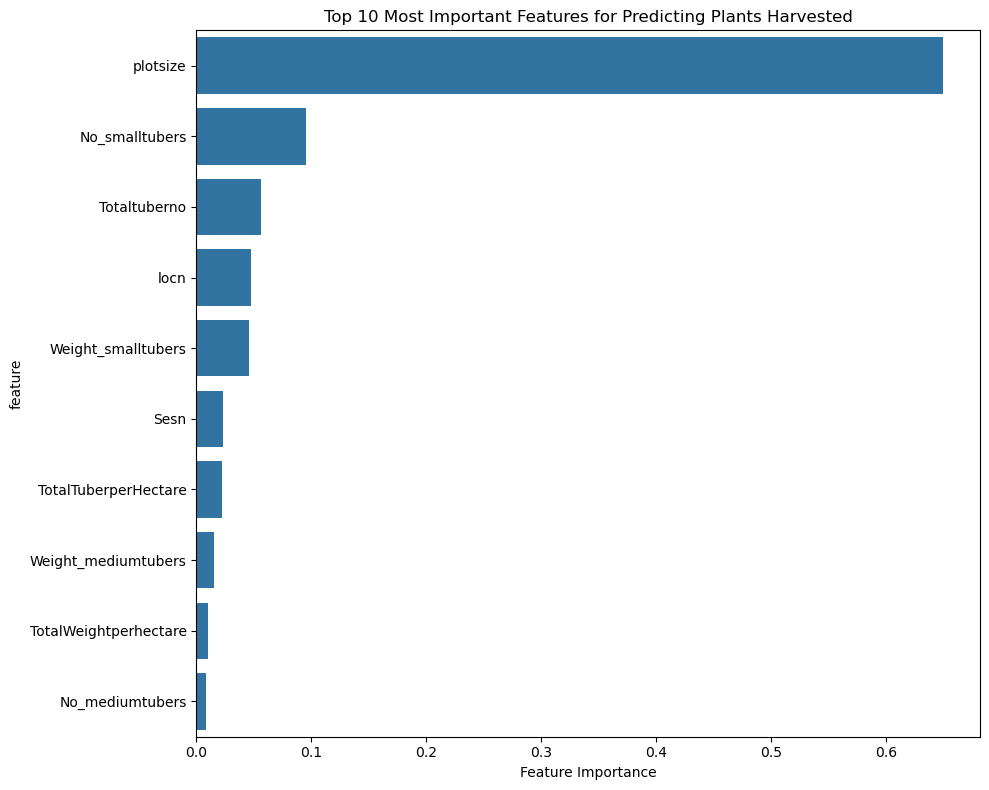


5g. MODEL DIAGNOSTICS AND VISUALIZATION


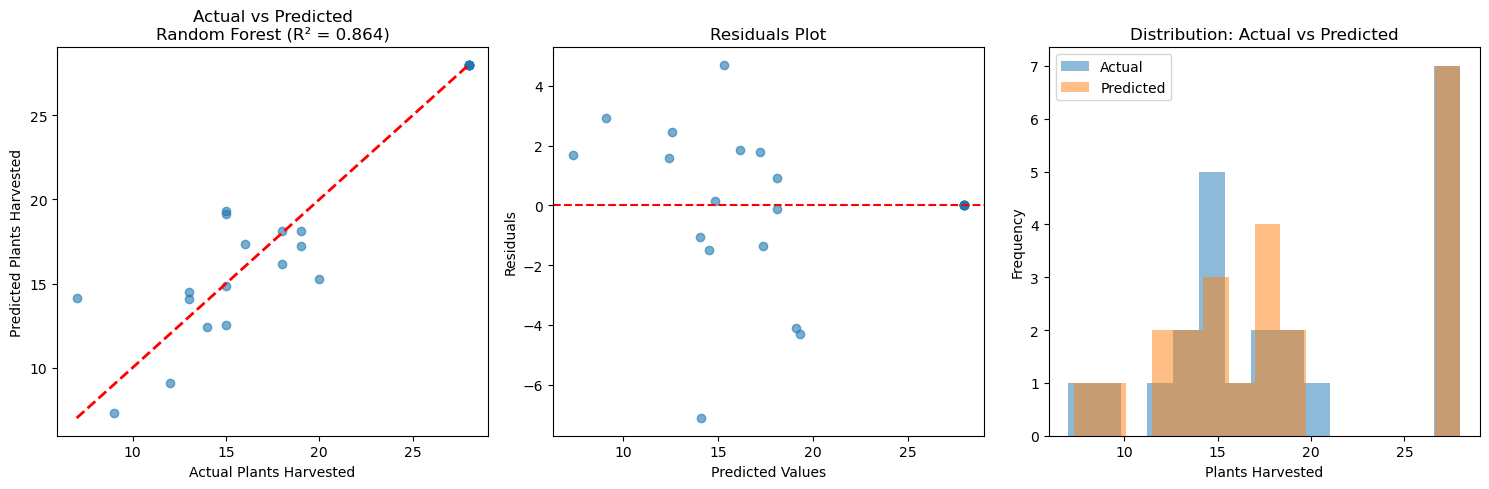


5h. MODEL INTERPRETATION AND RECOMMENDATIONS

MODEL ACCURACY ASSESSMENT:
R² Score: 0.8635
✓ Excellent predictive power
RMSE: 2.48 plants
This means our predictions are typically within ±2.5 plants of the actual values

RECOMMENDATIONS FOR FARMERS AND POLICYMAKERS:
1. The model can help predict plant harvest counts based on farming practices
2. Key factors influencing plant harvest (based on feature importance):
   1. plotsize
   2. No_smalltubers
   3. Totaltuberno
3. Farmers can use this model to optimize practices for better harvest
4. Policymakers can identify which factors most significantly affect cassava production


In [38]:
#QUESTION 5: PREDICTIVE MODEL FOR "Plants_harvested"

le = LabelEncoder()
scaler = StandardScaler()
print("\n" + "="*60)
print("QUESTION 5: PREDICTIVE MODEL FOR 'Plants_harvested'")
print("="*60)

#5a. Data preparation for predictive modeling
print("5a. DATA PREPARATION FOR PREDICTIVE MODELING")

#Select features for prediction
#Using variables that might influence plants harvested
feature_columns = [
    'Sesn', 'locn', 'block', 'rep', 'tillage', 'ferT',
    'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers',
    'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'Total_tubweight',
    'plotsize', 'TotalWeightperhectare', 'TotalTuberperHectare'
]

target_column = 'Plants_harvested'

#Create feature matrix and target vector
X = cassava[feature_columns].copy()
y = cassava[target_column]

#Handle categorical variables
categorical_cols = ['tillage', 'ferT']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable: {target_column}")
print(f"Number of features: {X.shape[1]}")

#Check for missing values in features
if X.isnull().sum().sum() > 0:
    print("Missing values found in features. Handling them...")
    X = X.fillna(X.mean())  # Fill numerical missing values with mean

#5b. Split data into training and testing sets
print("\n5b. DATA SPLITTING")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

#5c. Feature scaling
print("\n5c. FEATURE SCALING")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#5d. Train multiple models and compare performance
print("\n5d. MODEL TRAINING AND COMPARISON")

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    if model_name == 'Linear Regression':
        #Use scaled features for linear regression
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        #Use original features for tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    #Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }
    
    print(f"{model_name} Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")

#5e. Identify best model
print("\n5e. MODEL COMPARISON AND SELECTION")
best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
best_model = results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {best_model['r2']:.4f}")
print(f"RMSE: {best_model['rmse']:.2f}")

#5f. Feature importance analysis (for Random Forest)
if best_model_name == 'Random Forest':
    print("\n5f. FEATURE IMPORTANCE ANALYSIS")
    
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))
    
    #Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features for Predicting Plants Harvested')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

#5g. Model visualization and diagnostics
print("\n5g. MODEL DIAGNOSTICS AND VISUALIZATION")

#Actual vs Predicted plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, best_model['predictions'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Plants Harvested')
plt.ylabel('Predicted Plants Harvested')
plt.title(f'Actual vs Predicted\n{best_model_name} (R² = {best_model["r2"]:.3f})')

#Residuals plot
residuals = y_test - best_model['predictions']
plt.subplot(1, 3, 2)
plt.scatter(best_model['predictions'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

#Distribution comparison
plt.subplot(1, 3, 3)
plt.hist(y_test, alpha=0.5, label='Actual', bins=15)
plt.hist(best_model['predictions'], alpha=0.5, label='Predicted', bins=15)
plt.xlabel('Plants Harvested')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution: Actual vs Predicted')

plt.tight_layout()
plt.show()

#5h. Model interpretation and recommendations
print("\n5h. MODEL INTERPRETATION AND RECOMMENDATIONS")

print(f"\nMODEL ACCURACY ASSESSMENT:")
print(f"R² Score: {best_model['r2']:.4f}")
if best_model['r2'] > 0.7:
    print("✓ Excellent predictive power")
elif best_model['r2'] > 0.5:
    print("✓ Good predictive power")
elif best_model['r2'] > 0.3:
    print("○ Moderate predictive power")
else:
    print("✗ Poor predictive power - model may not be reliable")

print(f"RMSE: {best_model['rmse']:.2f} plants")
print(f"This means our predictions are typically within ±{best_model['rmse']:.1f} plants of the actual values")

print(f"\nRECOMMENDATIONS FOR FARMERS AND POLICYMAKERS:")
print("1. The model can help predict plant harvest counts based on farming practices")
print("2. Key factors influencing plant harvest (based on feature importance):")
if best_model_name == 'Random Forest':
    top_features = feature_importance.head(3)['feature'].tolist()
    for i, feature in enumerate(top_features, 1):
        print(f"   {i}. {feature}")
print("3. Farmers can use this model to optimize practices for better harvest")
print("4. Policymakers can identify which factors most significantly affect cassava production")

# 5i. Cross-validation for more robust